# Scratch

Figure out how much the sequence length varies in the data.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
test = pd.read_csv('/scratch/gpfs/aa8417/QCB557_project/data/test.csv')
train = pd.read_csv('/scratch/gpfs/aa8417/QCB557_project/data/train.csv')

In [9]:
test_seqs = test['sequence'].tolist()
train_seqs = train['sequence'].tolist()

In [11]:
seqs = test_seqs + train_seqs

In [13]:
def get_seq_lengths(sequences):
    seq_lengths = []
    for sequence in sequences:
        length = len(sequence)
        seq_lengths.append(length)
    return seq_lengths

lengths = get_seq_lengths(seqs)

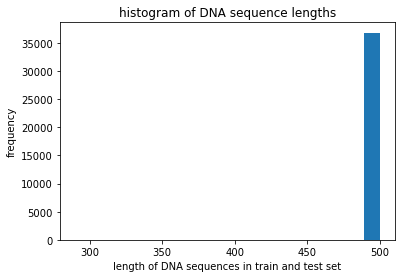

In [28]:
plt.hist(lengths, bins=20)
plt.xlabel('length of DNA sequences in train and test set')
plt.ylabel('frequency')
plt.title('histogram of DNA sequence lengths')

plt.show()

In [21]:
min(lengths)

290

In [19]:
max(lengths)

500

So, sequence lengths range from 290 to 500. So max_length in tokenizer should be 500.

### Code bank

In [ ]:
#DON'T NEED THIS ANYMORE
#change classification head of the model
#reference: https://discuss.huggingface.co/t/how-do-i-change-the-classification-head-of-a-model/4720/3
class BinaryDNABERT2Model(nn.Module):
    def __init__(self):
        super(BinaryDNABERT2Model, self).__init__()

        self.base_model = AutoModel.from_pretrained("zhihan1996/DNABERT-2-117M", trust_remote_code=True, config=config).to(device)
        self.dropout = nn.Dropout(0.5)
        self.linear = nn.Linear(768, 2) # output features from bert is 768 and 2 is number of labels
        
    def forward(self, input_ids, attn_mask):
        outputs = self.base_model(input_ids, attention_mask=attn_mask)
        # You write you new head here
        outputs = self.dropout(outputs[0])
        outputs = self.linear(outputs)
        
        return outputs

In [ ]:
class DataCollatorForSupervisedDataset(object):
    """Collate examples for supervised fine-tuning."""

    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.Tensor(labels).long()
        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )